In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sibtainwali","key":"dab2f11f7979d1efda7e5b520ec68dc2"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [5]:
!kaggle datasets list -s "customer segmentation"


ref                                                                 title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
vetrirah/customer                                                   Customer Segmentation                                  107152  2020-08-28 11:19:39.100000          22646        178  1.0              
vjchoudhary7/customer-segmentation-tutorial-in-python               Mall Customer Segmentation Data                          1583  2018-08-11 07:23:02.830000         243708       1834  0.88235295       
abisheksudarshan/customer-segmentation                              Customer Segmentation                                  101021  2023-08-25 10:12:20.753000           8328         78  1.0

In [7]:
!kaggle datasets download -d pratikmore94/mall-customers-csv
!unzip -o mall-customers-csv.zip


Dataset URL: https://www.kaggle.com/datasets/pratikmore94/mall-customers-csv
License(s): MIT
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.96MB/s]
Archive:  mall-customers-csv.zip
  inflating: Mall_Customers.csv      


In [8]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


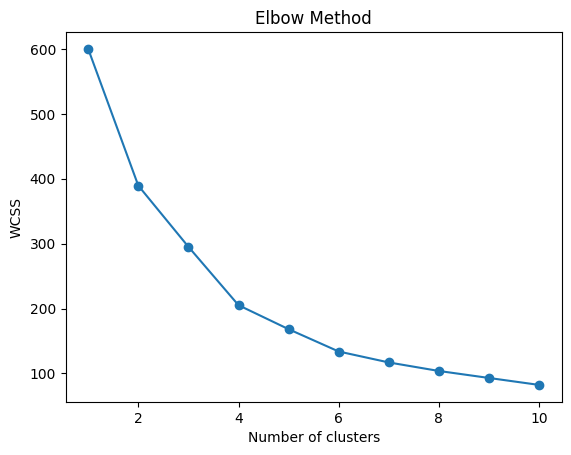

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


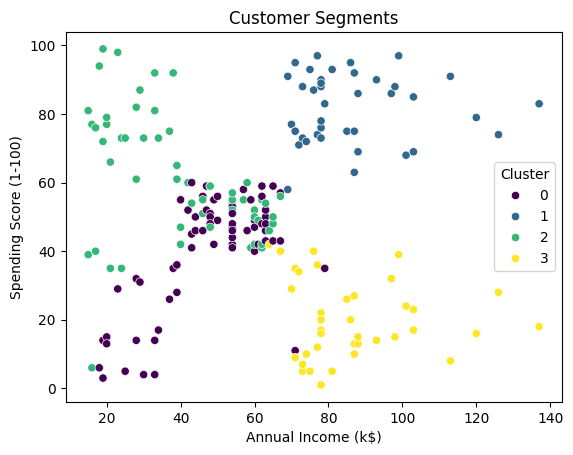

In [10]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segments")
plt.show()
